<a href="https://colab.research.google.com/github/Siddharth131020/Machine-learning/blob/main/logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
u_1 = np.array([2, 2])
u_2 = np.array([-5, -3])

In [3]:
cov_1 = np.array([[0.5, 1],
                  [1, 1]])
cov_2 = np.array([[1.5, 2],
                  [2, 0.1]])


In [4]:
d_1 = np.random.multivariate_normal(u_1, cov_1, 500)
d_2 = np.random.multivariate_normal(u_2, cov_2, 500)

<ipython-input-4-ae2aeaecc594>:1: RuntimeWarning: covariance is not positive-semidefinite.
  d_1 = np.random.multivariate_normal(u_1, cov_1, 500)
<ipython-input-4-ae2aeaecc594>:2: RuntimeWarning: covariance is not positive-semidefinite.
  d_2 = np.random.multivariate_normal(u_2, cov_2, 500)


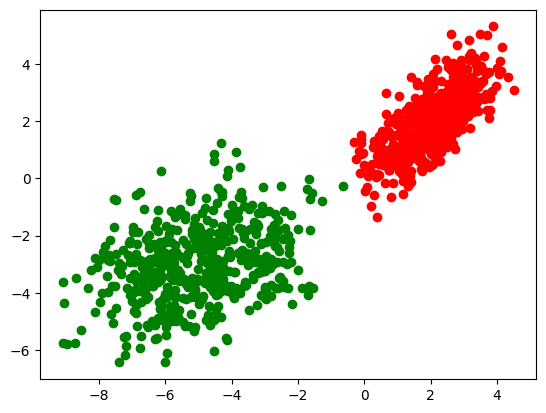

In [5]:
plt.scatter(d_1[:, 0], d_1[:, 1], color='red')
plt.scatter(d_2[:, 0], d_2[:, 1], color='green')

In [6]:
np.random.multivariate_normal?


In [7]:
dataset = np.ones((1000, 4))


In [8]:
dataset[:5]


array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [9]:
dataset[:500, 1:3] = d_1
dataset[500:, 1:3] = d_2

In [10]:
dataset[:5]


array([[1.        , 2.46849554, 2.28083891, 1.        ],
       [1.        , 0.50507707, 0.801197  , 1.        ],
       [1.        , 3.03911242, 3.41208521, 1.        ],
       [1.        , 2.46029064, 2.4630654 , 1.        ],
       [1.        , 3.61723015, 4.27920151, 1.        ]])

In [11]:
dataset[:500, -1] = 0


In [12]:
dataset[:5]

array([[1.        , 2.46849554, 2.28083891, 0.        ],
       [1.        , 0.50507707, 0.801197  , 0.        ],
       [1.        , 3.03911242, 3.41208521, 0.        ],
       [1.        , 2.46029064, 2.4630654 , 0.        ],
       [1.        , 3.61723015, 4.27920151, 0.        ]])

In [13]:
dataset[-5:]

array([[ 1.        , -6.70811097, -3.10457551,  1.        ],
       [ 1.        , -4.40264461, -3.33858851,  1.        ],
       [ 1.        , -6.76716116, -2.85549486,  1.        ],
       [ 1.        , -3.85263614,  0.93564039,  1.        ],
       [ 1.        , -2.69039875, -2.36499395,  1.        ]])

In [14]:
np.random.shuffle(dataset)


In [15]:
dataset


array([[ 1.        , -6.93487605, -2.90851362,  1.        ],
       [ 1.        , -2.94984186, -4.22199271,  1.        ],
       [ 1.        ,  2.43900675,  2.57137942,  0.        ],
       ...,
       [ 1.        ,  0.65713724,  0.90212433,  0.        ],
       [ 1.        , -4.72343897, -2.94486402,  1.        ],
       [ 1.        , -8.24559327, -3.2066745 ,  1.        ]])

In [16]:
X_train = dataset[:800, :-1]
Y_train = dataset[:800, -1]

X_test = dataset[800:, :-1]
Y_test = dataset[800:, -1]

In [17]:
X_test.shape, Y_test.shape, X_train.shape, Y_train.shape


((200, 3), (200,), (800, 3), (800,))

In [18]:
def sigmoid(X):
    return 1/(1 + np.exp(-X))


In [19]:
def hypothesis(X, theta):
    return sigmoid(np.dot(X, theta))

In [20]:
def cost(X, Y, theta):
    y_p = hypothesis(X, theta)

    loss = -1*(np.mean(Y*np.log(y_p) + (1 - Y)*np.log(1 - y_p)))

    return loss

In [21]:
def gradient(X, Y, theta):
    y_p = hypothesis(X, theta)

    grad = X.T@(Y - y_p)

    return grad/X.shape[0]

In [22]:
def gradient_descent(X, Y, learning_rate = 0.003, epochs = 1000):
    m, n = X.shape
    theta = np.zeros((n, 1))

    cost_epoch = []

    for i in range(epochs):
        print("The algo is on epoch no.:", i, end='\r')
        loss = cost(X, Y, theta)
        grad = gradient(X, Y, theta)
        cost_epoch.append(loss)

        theta = theta + learning_rate*grad

    return theta, cost_epoch

In [23]:
Y_train = Y_train.reshape((-1, 1))
X_train.shape

(800, 3)

In [24]:
theta, cost = gradient_descent(X_train, Y_train, epochs=2000)


In [25]:
theta

array([[-0.24853949],
       [-0.91081433],
       [-0.70820469]])

In [26]:
cost[:10]


[0.6931471805599452,
 0.6791956953041555,
 0.6657250018613626,
 0.6527179686287736,
 0.640157737024789,
 0.6280277684337531,
 0.6163118840570094,
 0.6049942980543573,
 0.5940596444195461,
 0.5834929980732886]

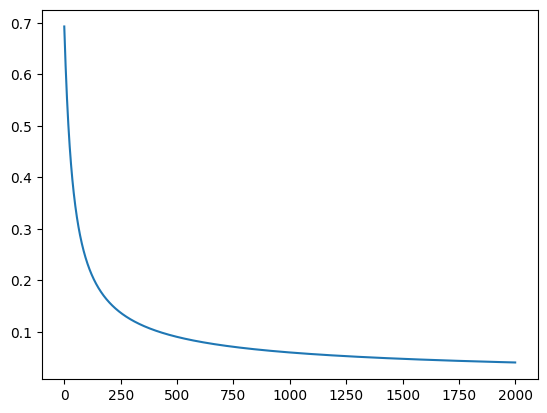

In [27]:
plt.plot(cost)

In [28]:
cost[-10:]

[0.040264097516411905,
 0.04025277225860415,
 0.04024145617179618,
 0.04023014924382476,
 0.04021885146254891,
 0.04020756281584989,
 0.04019628329163114,
 0.04018501287781824,
 0.040173751562358806,
 0.040162499333222516]

In [29]:
Y_test = Y_test.reshape((-1, 1))
Y_test.shape

(200, 1)

In [30]:
def predict(X, theta):
    y_p = hypothesis(X, theta)
    y_pred = []
    for i in y_p:
        if i>=0.5:
            y_pred.append(1)
        else:
            y_pred.append(0)

    y_pred = np.array(y_pred)
    return y_pred

In [31]:
pred = predict(X_test, theta)


In [32]:
pred = pred.reshape((-1, 1))
pred.shape

(200, 1)

In [33]:
Y_test.shape

(200, 1)

In [34]:
def accuracy(pred, label):
    temp = 0

    for i in range(pred.shape[0]):
        if pred[i]==label[i]:
            temp+=1
        else:
            pass
    print("Accuracy = ", (temp/pred.shape[0])*100, "%", sep='')
    return (temp/pred.shape[0])*100

In [35]:
accuracy(pred, Y_test)


Accuracy = 100.0%


100.0